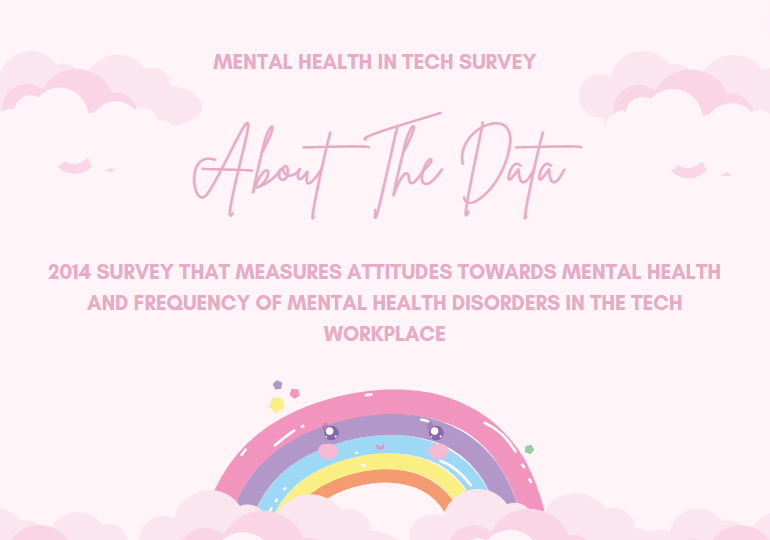

| Column Name | Description |
:------------|:----------
|Timestamp | Timestamp|
|    Age    |      Age |
| Gender    | Gender |
| Country | Country |
| state |   If you live in the United States, which state or territory do you live in? |
| self_employed |   Are you self-employed? |
| family_history | Do you have a family history of mental illness? |
| treatment | Have you sought treatment for a mental health condition? |
| work_interfere | If you have a mental health condition, do you feel that it interferes with your work? |
| no_employees | How many employees does your company or organization have? |
| remote_work | Do you work remotely (outside of an office) at least 50% of the time? |
| tech_company | Is your employer primarily a tech company/organization? |
| benefits | Does your employer provide mental health benefits? |
| care_options | Do you know the options for mental health care your employer provides? |
| wellness_program | Has your employer ever discussed mental health as part of an employee wellness program? |
| seek_help | Does your employer provide resources to learn more about mental health issues and how to seek help? |
|anonymity|Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatmentresources?|
| leave | How easy is it for you to take medical leave for a mental health condition? |
|mentalhealthconsequence| Do you think that discussing a mental health issue with your employer would have negative consequences?|
| physhealthconsequence | Do you think that discussing a physical health issue with your employer would have negative consequences? |
| coworkers |   Would you be willing to discuss a mental health issue with your coworkers? |
| supervisor |   Would you be willing to discuss a mental health issue with your direct supervisor(s)? |
| mentalhealthinterview | Would you bring up a mental health issue with a potential employer in an interview? |
| physhealthinterview |   Would you bring up a physical health issue with a potential employer in an interview? |
|    mentalvsphysical    | Do you feel that your employer takes mental health as seriously as physical health? |
|obs_consequence|Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? |
|    comments    |  Any additional notes or comments |

## Importing important libraries

In [1]:
%clear

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import math
import warnings
warnings.filterwarnings('ignore')

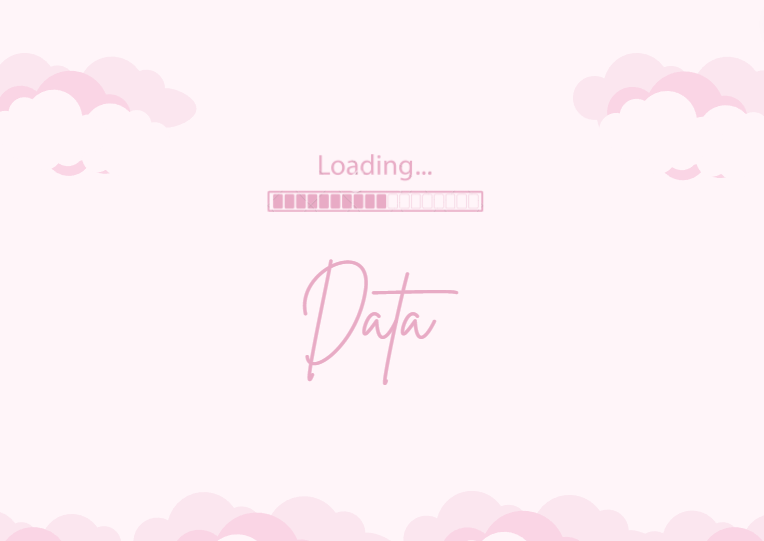

## Reading our data using pandas package and quickly testing if we have the right data using the .head() method and choosing a pink background color to matchour notebook theme

In [4]:
data=pd.read_csv(r'D:\projectatyyyyy\ML\mental_health\project\survey.csv')
data.head(10).style.applymap(lambda x : "background-color: #f5e9f2")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,nan,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,nan
1,2014-08-27 11:29:37,44,M,United States,IN,nan,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,nan
2,2014-08-27 11:29:44,32,Male,Canada,nan,nan,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,nan
3,2014-08-27 11:29:46,31,Male,United Kingdom,nan,nan,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,nan
4,2014-08-27 11:30:22,31,Male,United States,TX,nan,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,nan
5,2014-08-27 11:31:22,33,Male,United States,TN,nan,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,nan
6,2014-08-27 11:31:50,35,Female,United States,MI,nan,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,nan
7,2014-08-27 11:32:05,39,M,Canada,nan,nan,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,nan
8,2014-08-27 11:32:39,42,Female,United States,IL,nan,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,nan
9,2014-08-27 11:32:43,23,Male,Canada,nan,nan,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,nan


# part 1

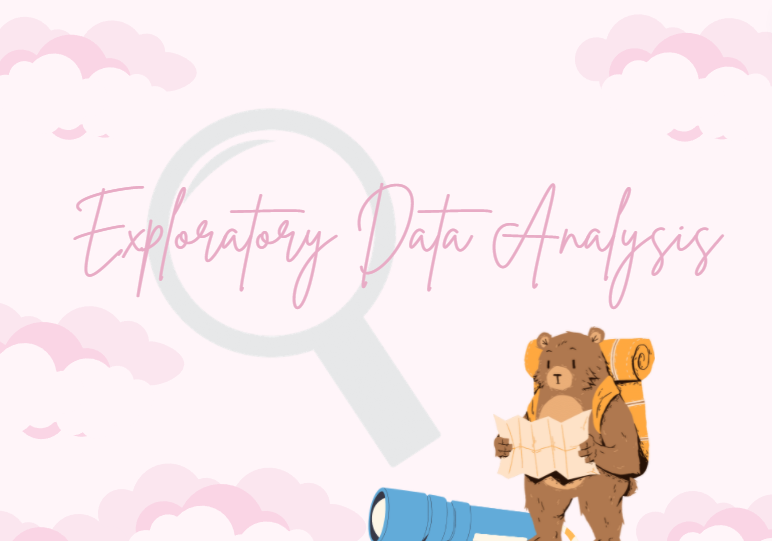

## Doing some EDA ( Exploratory Data Analysis ) to get an over view of our data 

In [5]:
print('\033[1m' + 'Shape of the data (rows, columns):' + '\033[0m')
print(data.shape)

Shape of the data (rows, columns):
(1259, 27)


## Calculating every unique value in each column 

In [6]:
for col in data.columns:
    print('\033[1m' + 'Unique values in {} :'.format(col) + '\033[0m',len(data[col].unique()))

Unique values in Timestamp : 1246
Unique values in Age : 53
Unique values in Gender : 49
Unique values in Country : 48
Unique values in state : 46
Unique values in self_employed : 3
Unique values in family_history : 2
Unique values in treatment : 2
Unique values in work_interfere : 5
Unique values in no_employees : 6
Unique values in remote_work : 2
Unique values in tech_company : 2
Unique values in benefits : 3
Unique values in care_options : 3
Unique values in wellness_program : 3
Unique values in seek_help : 3
Unique values in anonymity : 3
Unique values in leave : 5
Unique values in mental_health_consequence : 3
Unique values in phys_health_consequence : 3
Unique values in coworkers : 3
Unique values in supervisor : 3
Unique values in mental_health_interview : 3
Unique values in phys_health_interview : 3
Unique values in mental_vs_physical : 3
Unique values in obs_consequence : 2
Unique values in comments : 161


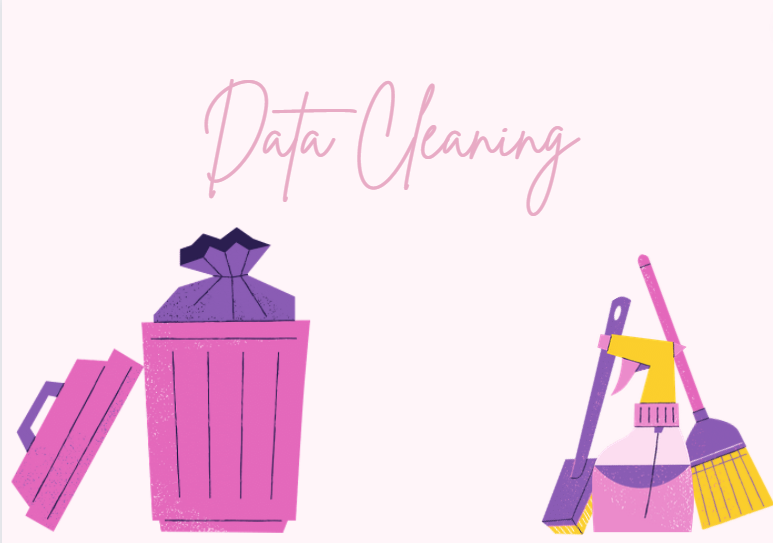

# Missing values


### Calculating the percentage of the missing value in each column (sate, work_interfere, self_employed, comments) by creating a function called missing_values_table and creating a table with column for the missing value number and another column for the missing values percentage to help us decide what we should do to fill in these values

In [7]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        table = pd.concat([mis_val, mis_val_percent], axis=1)

        col_names = table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        col_names= col_names[col_names.iloc[:,1] != 0].sort_values('% of Total Values',
                                                                   ascending=False).round(1)
        
        print ("Dataframe has " + str(df.shape[1]) + " columns,"      
            "And there exist " + str(col_names.shape[0]) +
              " columns missing value(s)")
        
        return col_names
    
summary=missing_values_table(data)
summary

Dataframe has 27 columns,And there exist 4 columns missing value(s)


,Missing Values,% of Total Values
comments,1095,87.0
state,515,40.9
work_interfere,264,21.0
self_employed,18,1.4


## Visualizing the missing Value using heatmap from seaborn library to easily detect them

### Notice the amount of missing values in work_interfere, self_employed and comments that need to be handled

<AxesSubplot:>

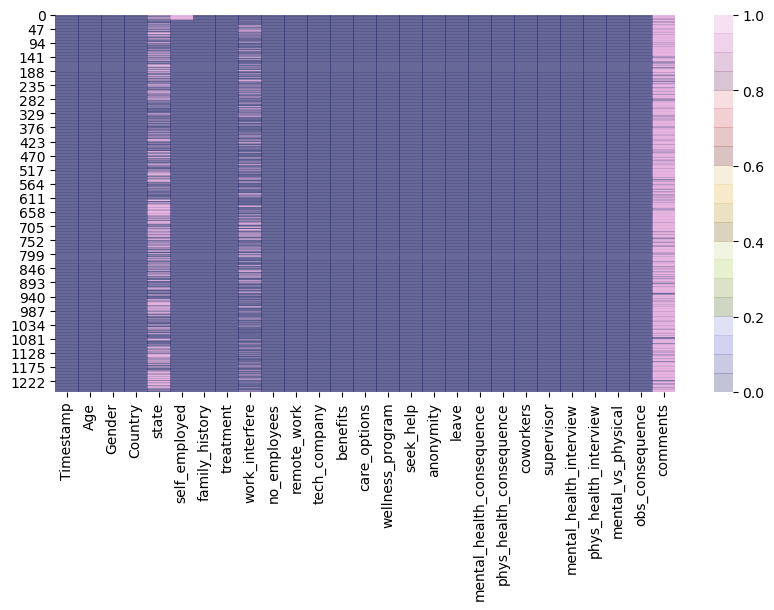

In [8]:
plt.figure(figsize=(10,5) , dpi=100)
sns.heatmap(data.isna(), cmap='tab20b', alpha = 0.3)

# Imputing missing values

In [9]:
(len(data[data['self_employed']=='Yes'])/len(data),len(data[data['self_employed']=='No'])/len(data))

(0.11596505162827642, 0.8697378872120731)

In [10]:
data['self_employed'] = data['self_employed'].fillna(pd.Series(np.random.choice(['Yes', 'No'], p=[ 0.11764705882352941, 0.8823529411764706], size=len(data))))

data['work_interfere'] = data['work_interfere'].fillna('not suffering')

print('Total empty values in the Dataset :', data.isnull().sum().sum())

Total empty values in the Dataset : 1610


## Checking on the duplicated values

In [11]:
print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
print(data.duplicated().sum())

Number of duplicate values :
0


there's no duplicates in data

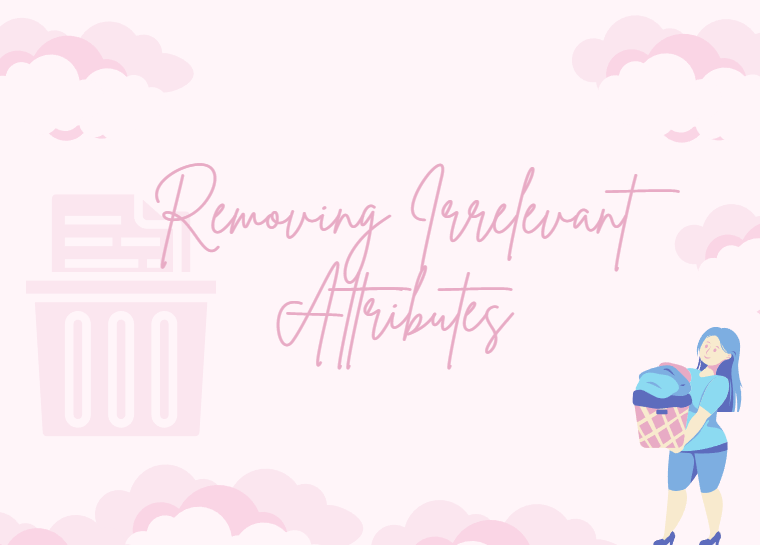

# Irrelevant Attributes
### All of these three features will not be helpful in the modeling phase so we drop the columns 

In [12]:
data = data.drop(columns=['state', 'Timestamp', 'comments'])
print('Columns after update :', len(data.columns))

Columns after update : 24


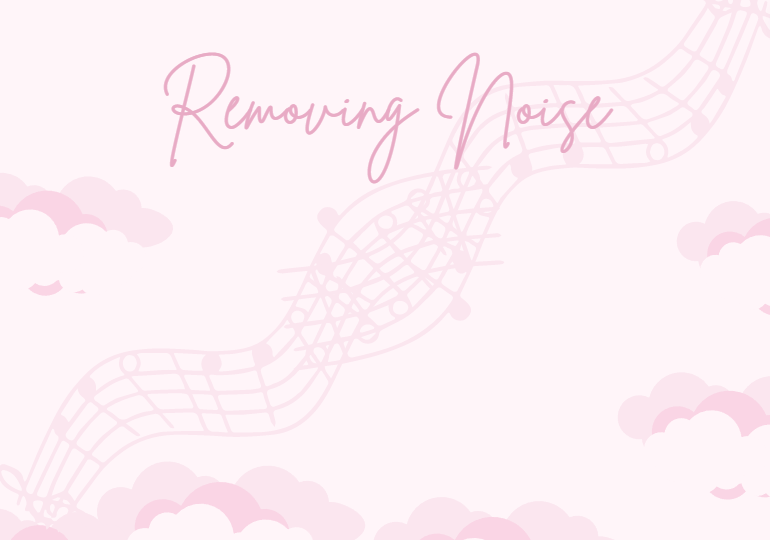

# Removing Noise

## Printing out the unique values of the ages to check if there is any wrong insertions of the age value 

In [13]:
data['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

## Taking only the age range 18 to 70 in consideration because values like (-1 and 999999) are undoubtedly wrong insertions

In [14]:
data['Age'].replace([data['Age'][data['Age'] < 18]], np.nan, inplace = True)
data['Age'].replace([data['Age'][data['Age'] > 72]], np.nan, inplace = True)

data['Age'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., nan, 43., 56., 60., 54., 55., 48., 20., 57., 58., 47.,
       62., 51., 65., 49., 53., 61., 72.])

In [15]:
data['Age'].isnull().sum()

8

## Notice how the age data is skewed (an indecator we can use median to fill in missing values)

<AxesSubplot:xlabel='Age', ylabel='Density'>

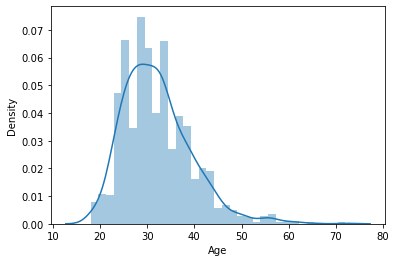

In [16]:
sns.distplot(data.Age,)

## we use the median to fill the 8 missing age values we found

In [17]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Age']

0       37.0
1       44.0
2       32.0
3       31.0
4       31.0
        ... 
1254    26.0
1255    32.0
1256    34.0
1257    46.0
1258    25.0
Name: Age, Length: 1259, dtype: float64

## Why use the median ?

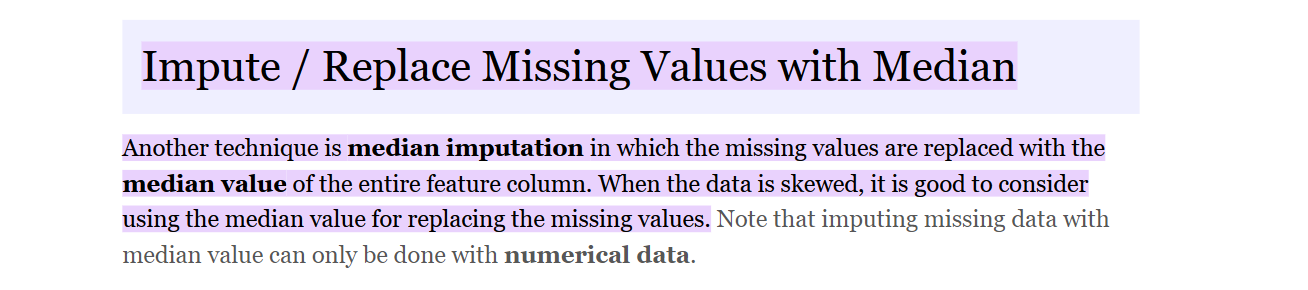

In [18]:
data['Age'].isnull().sum()

0

## Printing out summary statistics for the age after filling in the missing values 

In [19]:
print('Summary statistics for the data :')
data.describe()

Summary statistics for the data :


,Age
count,1259.000000
mean,32.069897
std,7.265565
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


## We use unique()  to see all the unique values in Gender and then group them into three categories  Female, Male and others

In [20]:
data.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [21]:
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male','Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                    'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female','femail', 'Cis Female', 'cis-female/femme', 
                    'Femake', 'Female (cis)','woman',], 'Female', inplace = True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary','fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All','ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?','Guy (-ish) ^_^', 'Trans woman',], 'Queer', inplace = True)

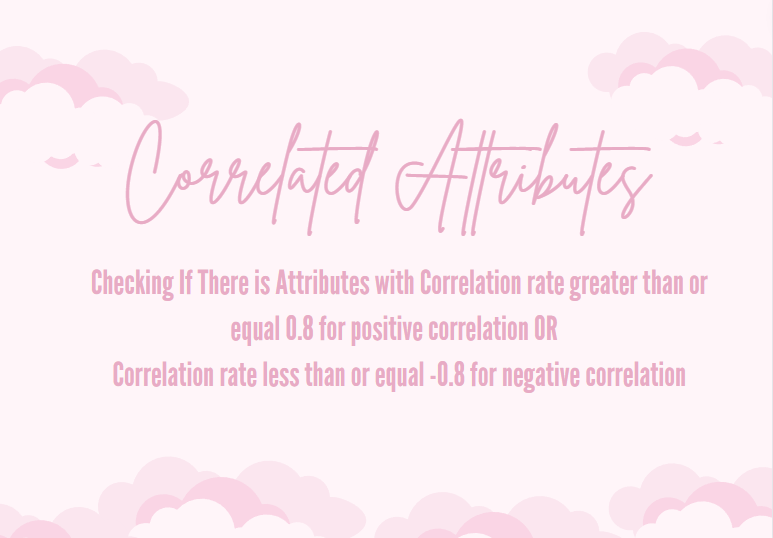

# Correlation Matrix
## we calculated the correlation value of the data then we plotted the results using seaborn’s heatmap to visualize the result ,No value was greater than 0.8 or less than -0.8 so we don't have any features with high correlation that needs to be handled

<AxesSubplot:>

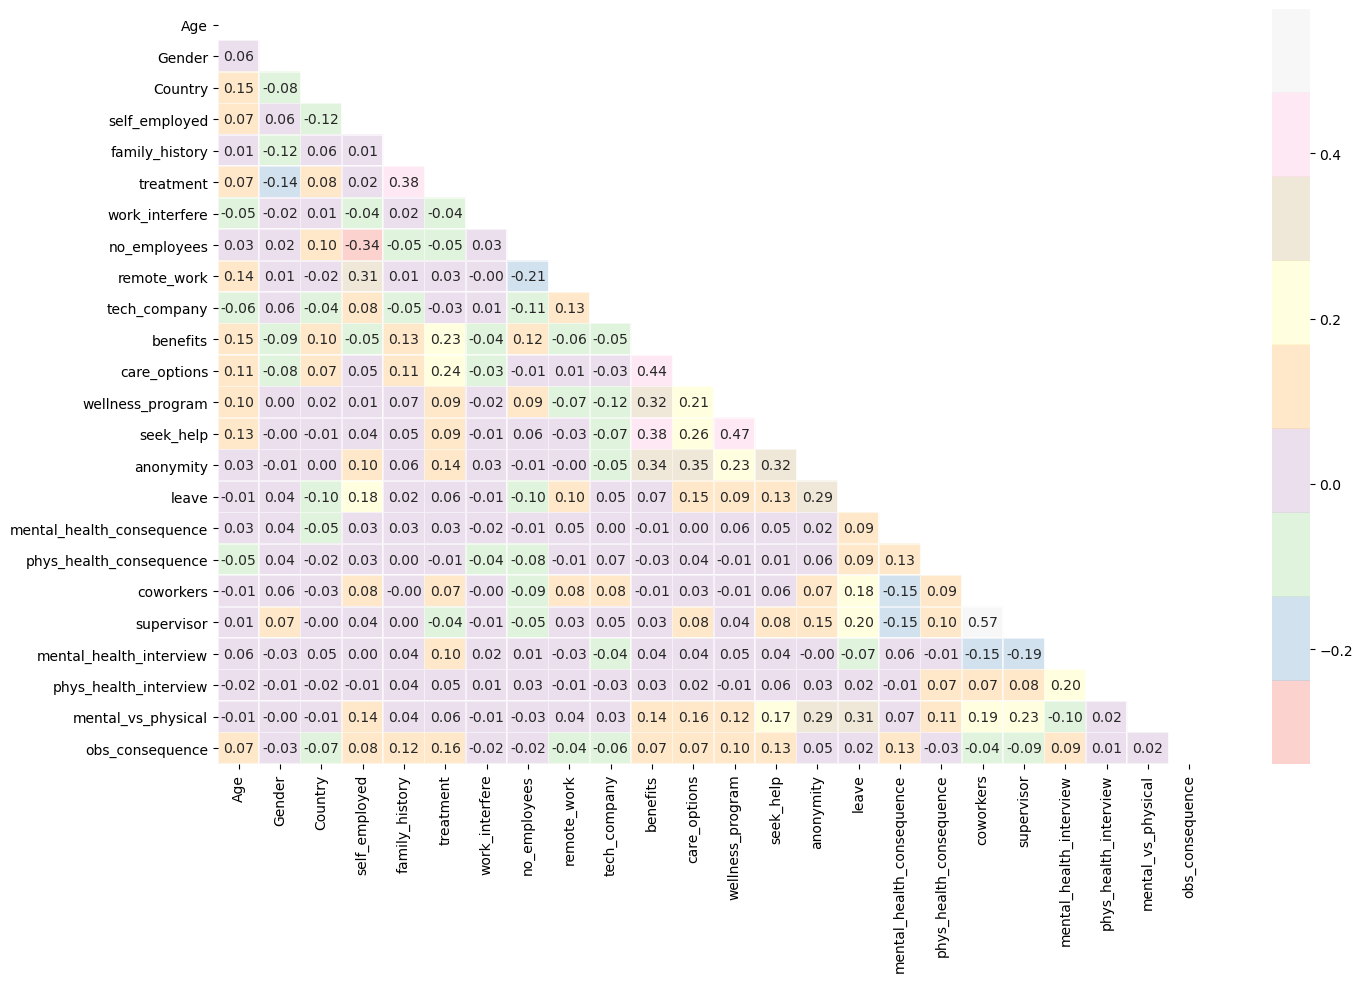

In [22]:
df = data.copy()
cols = df.columns
encoder = LabelEncoder()
for col in cols:
    encoder.fit(df[col])
    df[col] = encoder.transform(df[col])

plt.figure(figsize = (16, 10), dpi = 100)

corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr, mask = mask , cmap = 'Pastel1', annot = True , linewidths = 0.5 , fmt = ".2f" , alpha = 0.6)

there's no high correlated attribute (-0.8,0.8)

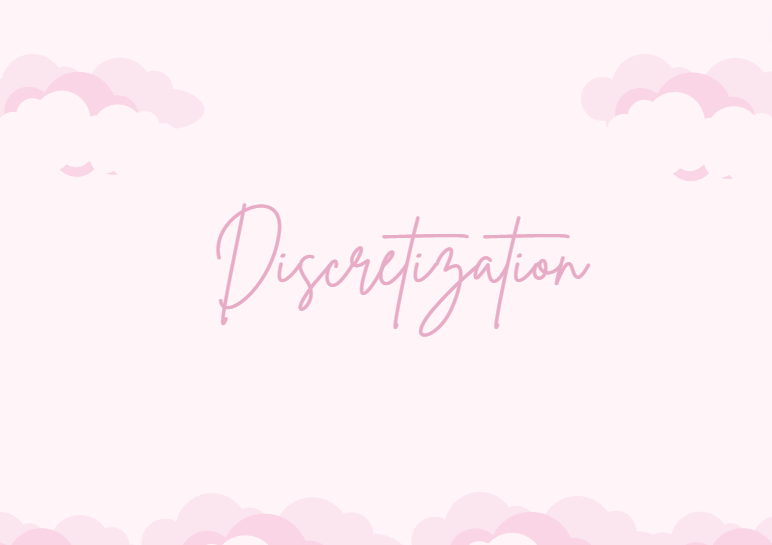

#  Discretization

## We discretized Age to a discrete set of ages  [youth, adults, seniors ] 

In [23]:
#data['Age_cat']=pd.cut(data.Age,bins=[17,25,64,72],labels=['Youth','Adult','Senior'])
#data['Age_cat'].value_counts()

In [24]:
data.head(10).style.applymap(lambda x : "background-color: #f5e9f2")

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.000000,Female,United States,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44.000000,Male,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32.000000,Male,Canada,Yes,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31.000000,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31.000000,Male,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33.000000,Male,United States,No,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35.000000,Female,United States,No,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39.000000,Male,Canada,No,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No
8,42.000000,Female,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23.000000,Male,Canada,No,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [25]:
#x=data['Age_cat'].value_counts().index
#print(x)
#y=data['Age_cat'].value_counts().values.tolist()
#print(y)

In [26]:
#plt.figure(figsize=(8,8))
#pal = sns.color_palette("PuRd")
#explode needs a length to function so making a for loop makes it more dynamic
#plt.pie(y, labels=x, colors=pal,autopct='%1.1f%%',
#        explode=[0.03 for i in data['Age_cat'].value_counts().index])
#plt.show()

## Writing and saving the data after the preprocessing phase to a csv file and an Excel worksheet to analyse it using data analysis tools like Power BI or tableau (Run only one time)

In [27]:
#data.to_excel('Clean_survey_data.xlsx')
#data.to_csv('Clean_survey_data.csv')

## After using power BI for visualization we continue preprocessing

In [28]:
#drop age column and work with age category 
#data = data.drop(columns=['Age'])

In [29]:
data['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [30]:
#group  the countries in form of continent as we can
data['Country'].replace(['United States','Canada','Mexico','Bahamas, The','Costa Rica'], 'North America', inplace = True)
data['Country'].replace(['United Kingdom','Bulgaria','France','Portugal' , 'Netherlands','Switzerland','Poland','Germany',
                        'Italy','Sweden','Latvia','Romania','Belgium','Spain','Finland','Bosnia and Herzegovina','Hungary',
                        'Croatia','Norway','Denmark','Greece','Moldova','Georgia','Czech Republic','Ireland','Slovenia',
                        'Austria'], 'Europe', inplace = True)
data['Country'].replace(['Zimbabwe', 'Nigeria'], 'Africa', inplace = True)
data['Country'].replace(['Russia','Israel','Singapore','Japan','Thailand','China','Philippines','India'], 'Asia', inplace = True)
data['Country'].replace(['Brazil','Colombia','Uruguay'], 'South America', inplace = True)

In [31]:
data.head().style.applymap(lambda x : "background-color: #f5e9f2")

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.000000,Female,North America,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44.000000,Male,North America,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32.000000,Male,North America,Yes,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31.000000,Male,Europe,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31.000000,Male,North America,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# Part 2

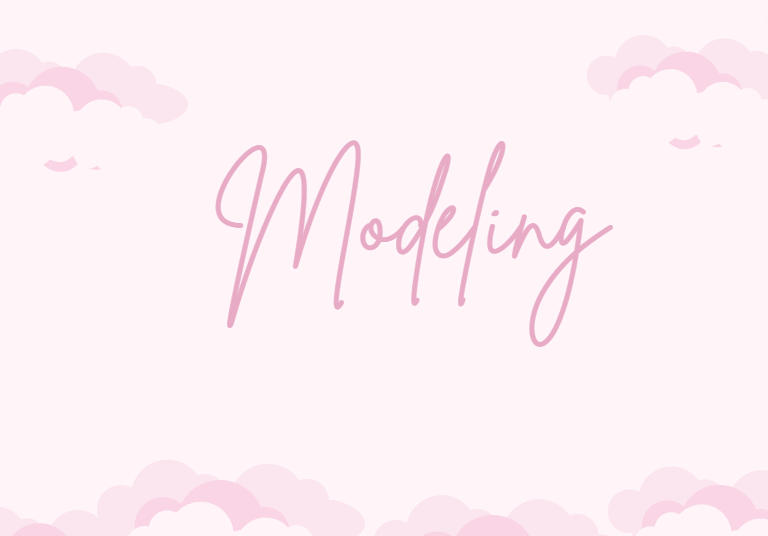

In [32]:
#from sklearn import preprocessing
encoded_data=data.apply(LabelEncoder().fit_transform)
encoded_data.head().style.applymap(lambda x : "background-color: #f5e9f2")

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,19,0,5,0,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0
1,26,1,5,0,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,14,1,5,1,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0
3,13,1,3,0,1,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1
4,13,1,5,0,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0


# Exploring Target Variable


In [33]:
df['self_employed'].value_counts()

0    1111
1     148
Name: self_employed, dtype: int64

# Problem Of Imbalanced Data 

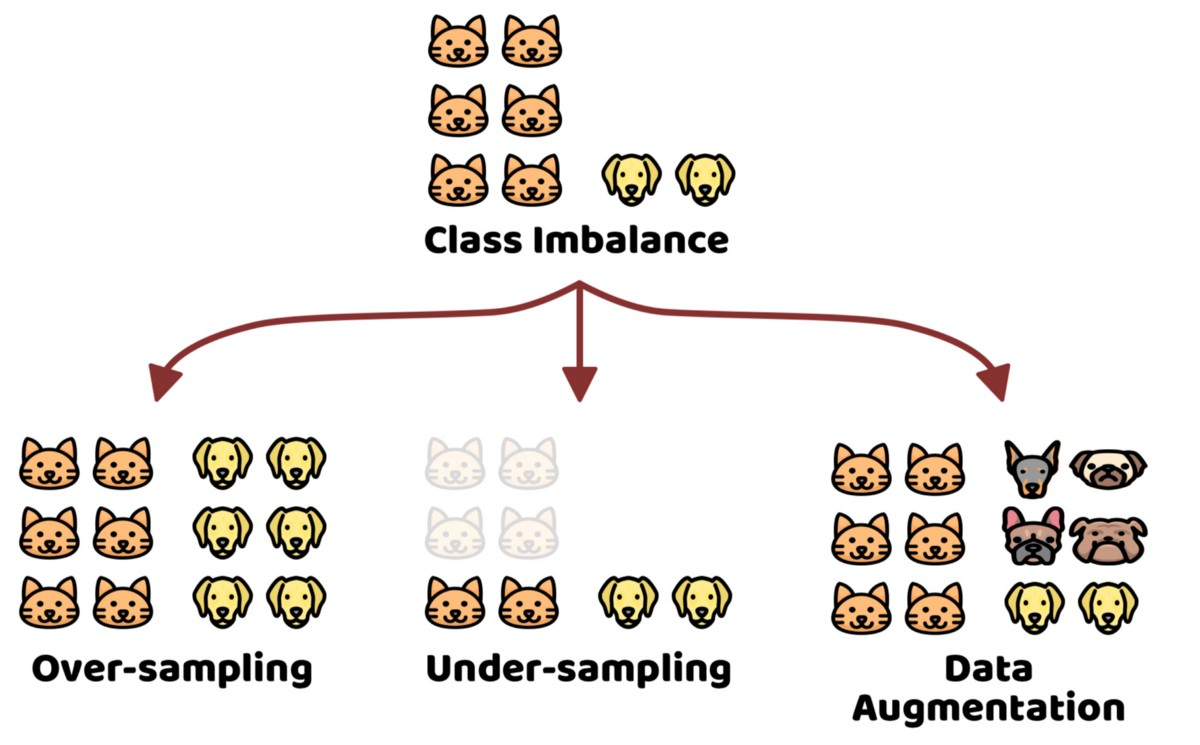

In [34]:
df = encoded_data.copy()

X = df.drop(['self_employed'], axis=1)
y = df['self_employed']

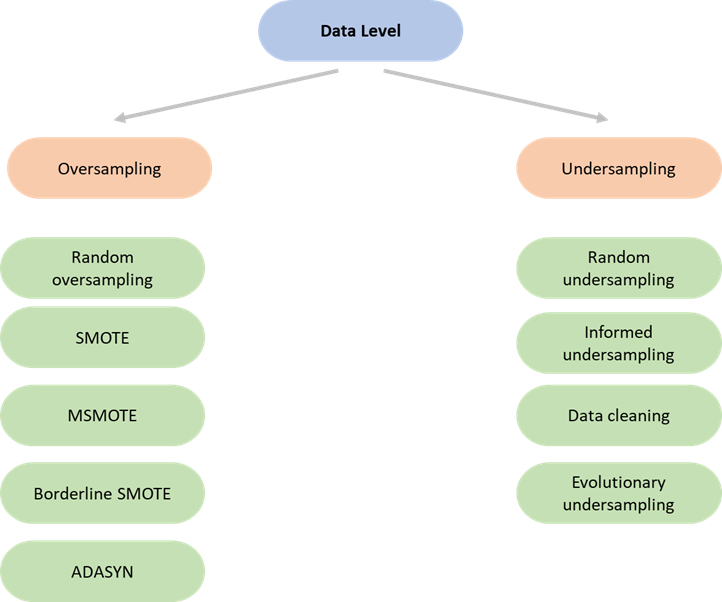

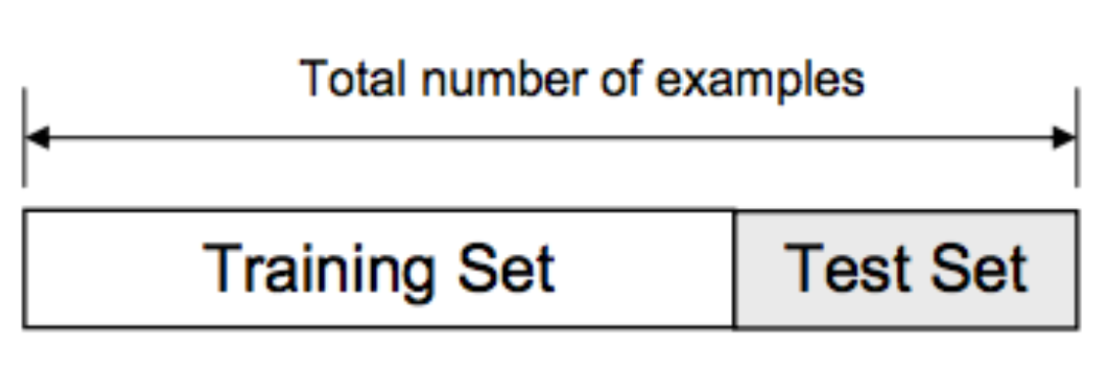

In [37]:
conda install -c conda-forge imbalanced-learn


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Tota\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py38haa244fe_1         980 KB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda               pkgs/main::conda-4.9.



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda








python_abi-3.8       | 4 KB      |            |   0% 
python_abi-3.8       | 4 KB      | ########## | 100% 
python_abi-3.8       | 4 KB      | ########## | 100% 

imbalanced-learn-0.7 | 97 KB     |            |   0% 
imbalanced-learn-0.7 | 97 KB     | #6         |  17% 
imbalanced-learn-0.7 | 97 KB     | ####9      |  50% 
imbalanced-learn-0.7 | 97 KB     | ########## | 100% 
imbalanced-learn-0.7 | 97 KB     | ########## | 100% 

conda-22.9.0         | 980 KB    |            |   0% 
conda-22.9.0         | 980 KB    | 1          |   2% 
conda-22.9.0         | 980 KB    | #7         |  18% 
conda-22.9.0         | 980 KB    | ###7       |  38% 
conda-22.9.0         | 980 KB    | #####3     |  54% 
conda-22.9.0         | 980 KB    | ######2    |  62% 
conda-22.9.0         | 980 KB    | #########7 |  98% 
conda-22.9.0         | 980 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [38]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (1007, 23)
y_train dataset:  (1007,)
X_test dataset:  (252, 23)
y_test dataset:  (252,)


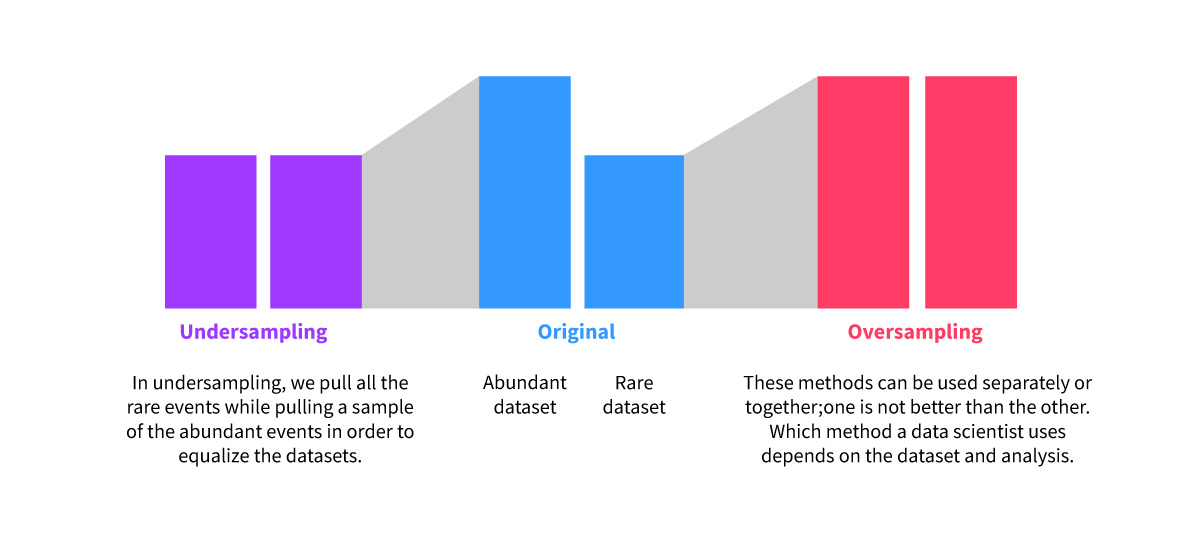

In [39]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X, y = sm.fit_resample(X, y)


print('After OverSampling, the shape of train_X: {}'.format(X.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y==0)))

Before OverSampling, counts of label '1': 110
Before OverSampling, counts of label '0': 897 

After OverSampling, the shape of train_X: (2222, 23)
After OverSampling, the shape of train_y: (2222,) 

After OverSampling, counts of label '1': 1111
After OverSampling, counts of label '0': 1111


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

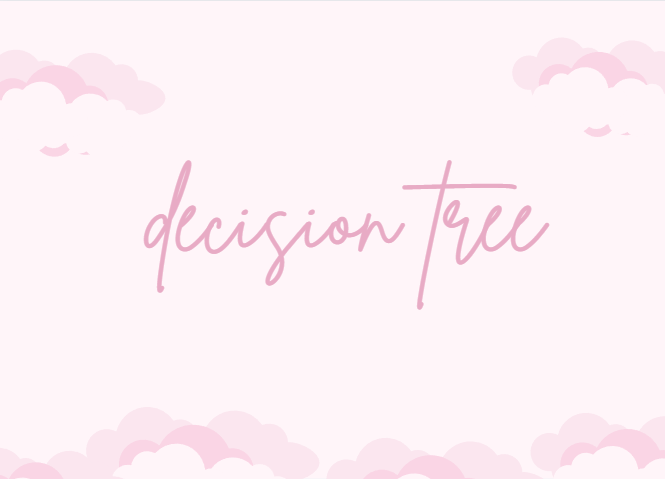

## Hyperparameter tuning 

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix



tree_params= param_dist={
   "criterion":['gini', 'entropy', 'log_loss'],
   "max_depth":[0,7,8,9,10,12,None],
    'splitter':['best', 'random'],
    #'max_features':[4,5,'auto', 'sqrt', 'log2'],
    'random_state':[4,5,6,7,8,9,None],
    #'max_leaf_nodes':[5,6,7,8,9,None]
}

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, scoring = 'accuracy',cv = 3)
tree_grid.fit(X_train, y_train)
tree_grid.best_estimator_
y_pred = tree_grid.predict(X_test)
best_score = tree_grid.best_score_
best_params = tree_grid.best_params_
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f'Training set score: {round(tree_grid.score(X_train, y_train) * 100, 2)}%')
print ('--')
print ('Testing set Score is',best_score * 100)
print ('--')
print ('Best Parameters is', best_params)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)

Training set score: 99.55%
--
Testing set Score is 89.64524178478648
--
Best Parameters is {'criterion': 'gini', 'max_depth': 12, 'random_state': 9, 'splitter': 'best'}
--
ROC Score is 0.8873737373737374
--
Recall Score is  0.9111111111111111
--
Confusion Matrix

 [[190  30]
 [ 20 205]]


# Decision Tree Using Entropy 

In [42]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=8, splitter ='random')

# fit the model
clf_en.fit(X_train, y_train)
 
y_pred_en = clf_en.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

y_pred_train_en = clf_en.predict(X_train)
print('accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)*100))

accuracy score: 92.8531


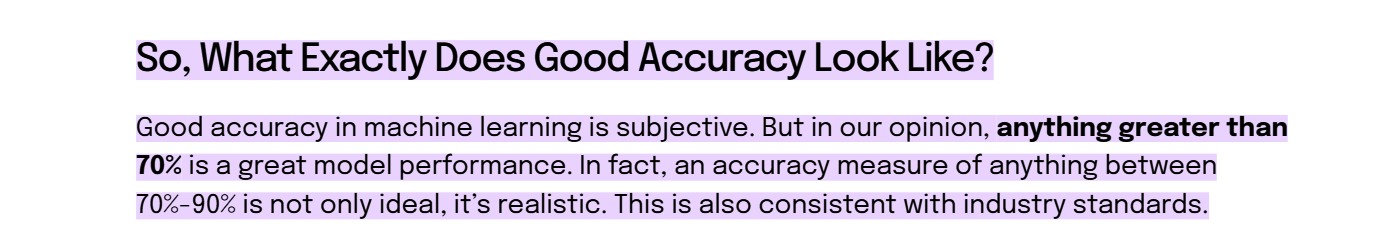
source : obviously.ai

## Decision tree symbols



Alternative branches: Alternative branches are two lines that branch out from one decision on your decision tree. These branches show two outcomes or decisions that stem from the initial decision on your tree.

Decision nodes: Decision nodes are squares and represent a decision being made on your tree. Every decision tree starts with a decision node. 

Chance nodes: Chance nodes are circles that show multiple possible outcomes.

End nodes: End nodes are triangles that show a final outcome.

## this code generated to us the decision tree before hyperparameter tuning but when we used it again with max_depth =7 it became so small and not clear so we left it as a comment and the tree before tuning will be inserted as a picutre in the report  

In [44]:
'''from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_en, 
                   feature_names=X_train.columns,  
                   class_names=str(y_train),
                   filled=True, rounded=True)

plt.savefig('tree.png', bbox_inches='tight',facecolor='white',dpi=1200) '''
print()

# Confusion matrix 

* True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

* True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

* False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

* False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

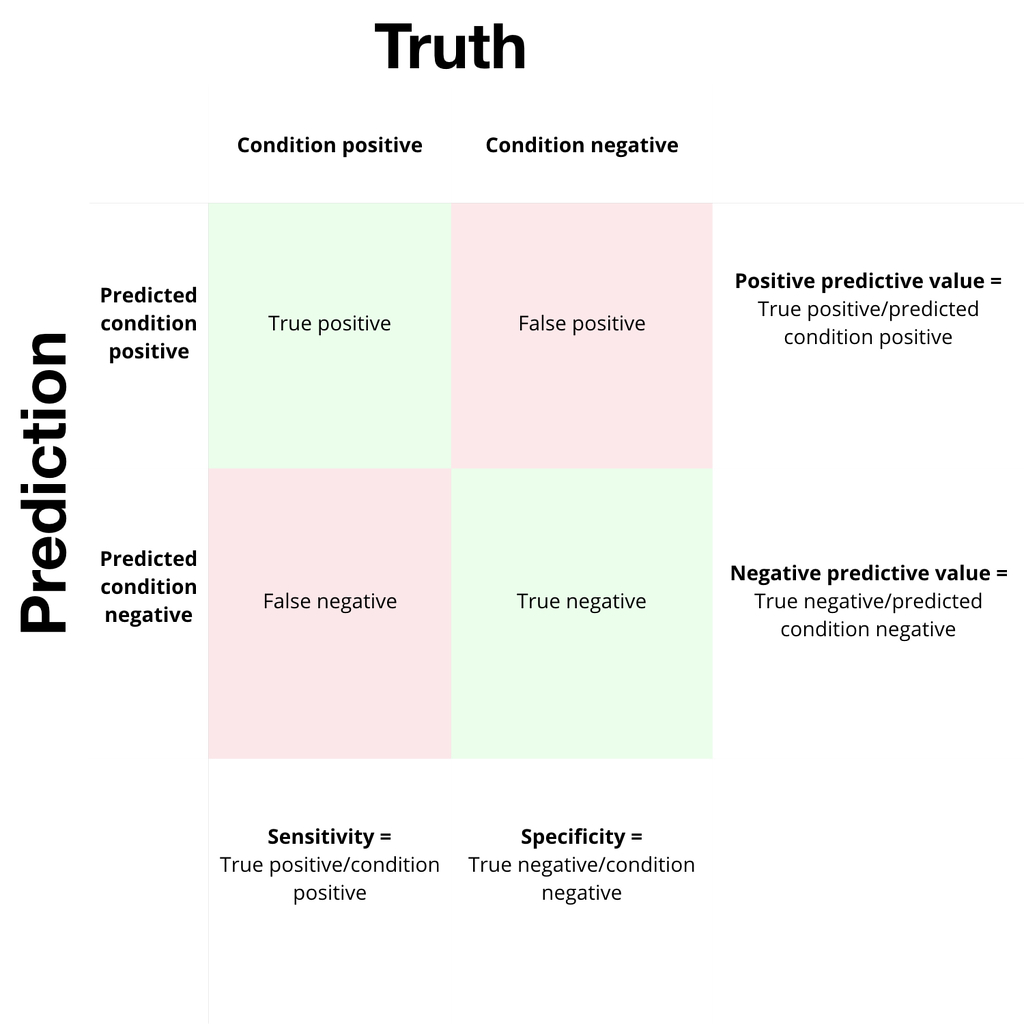

Confusion Matrix : 


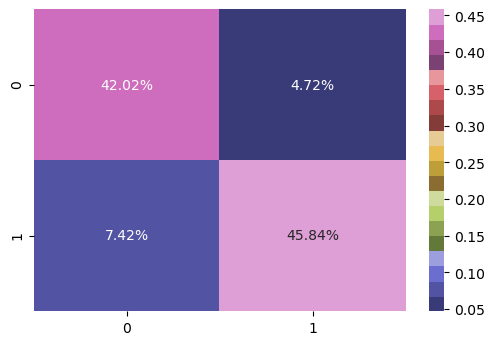

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_en, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
plt.figure(dpi=100)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap = 'tab20b')
plt.show()

# Classification Report

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       220
           1       0.86      0.91      0.88       225

    accuracy                           0.88       445
   macro avg       0.88      0.88      0.88       445
weighted avg       0.88      0.88      0.88       445



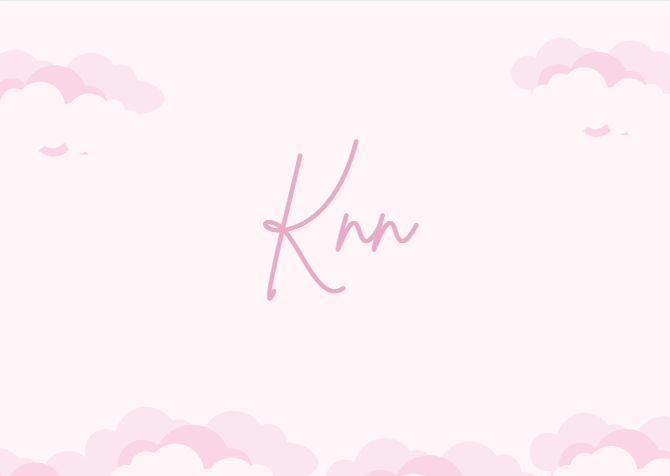

# K-Nearest Neighbors (KNN)

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry

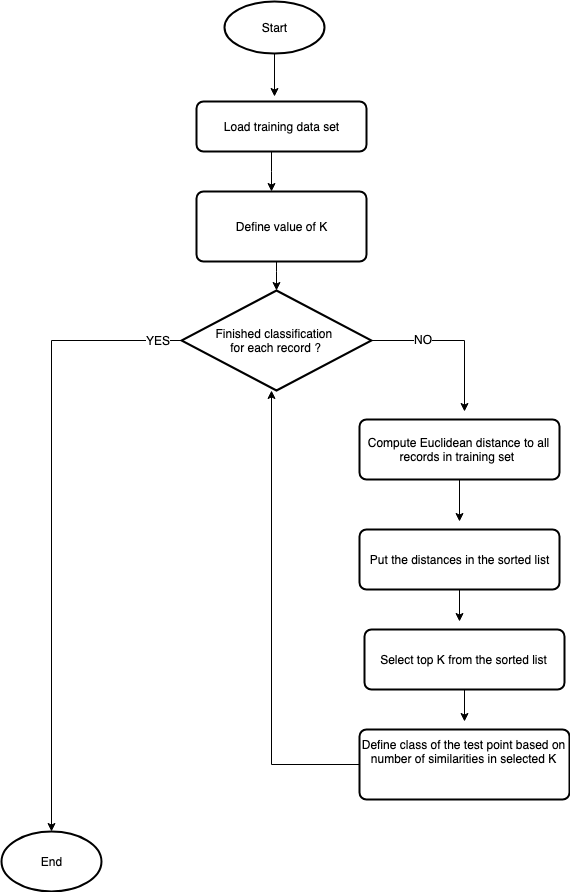

In [48]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
y_pred = knn.predict(X_test)

## To classify an unknown record:
* Initialize the K value.
* Calculate the distance between test input and K trained nearest neighbors.
* Check class categories of nearest neighbors and determine the type in which test input falls.
* Classification will be done by taking the majority of votes.
* Return the class category.

In [49]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 93.70786516853933 % and k = [2]


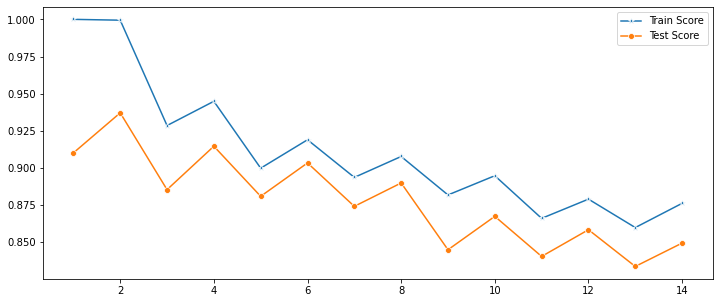

In [50]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [60]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(4)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)*100

91.46067415730337

# KNN confusion matrix

Confusion Matrix : 


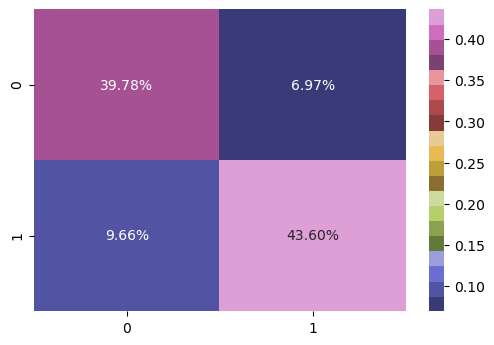

In [61]:
cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
plt.figure(dpi=100)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap = 'tab20b')
plt.show()

# KNN classification report

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       220
           1       0.82      0.86      0.84       225

    accuracy                           0.83       445
   macro avg       0.83      0.83      0.83       445
weighted avg       0.83      0.83      0.83       445



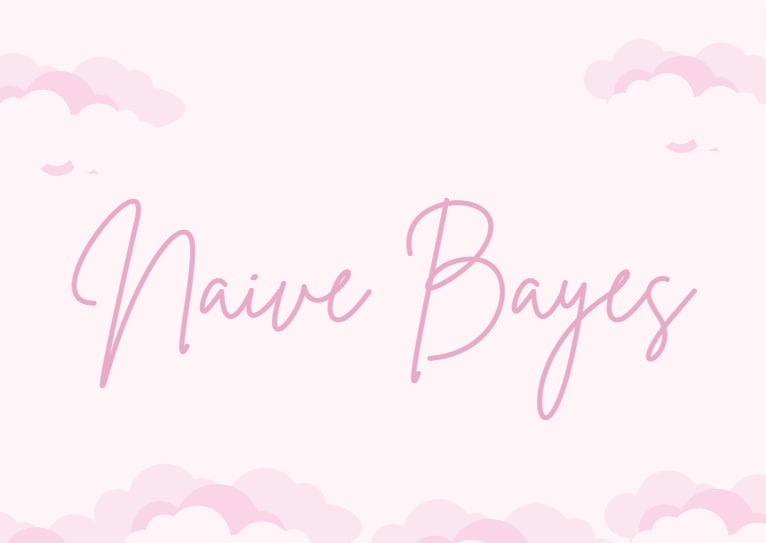

# Naive Bayes

In [54]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [55]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8337


In [56]:
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8182


# Check for overfitting and underfitting

In [57]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8182
Test set score: 0.8337


# naive bayes confusion matrix

Confusion Matrix : 


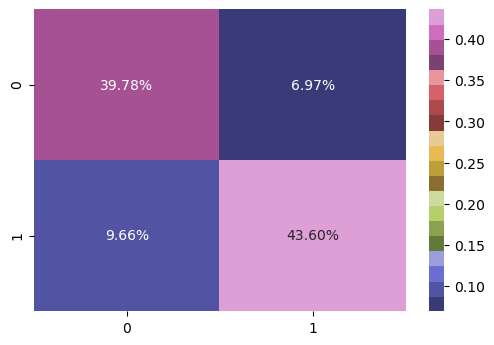

In [58]:
cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
plt.figure(dpi=100)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap = 'tab20b')
plt.show()

 # naive bayes classification report

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       220
           1       0.82      0.86      0.84       225

    accuracy                           0.83       445
   macro avg       0.83      0.83      0.83       445
weighted avg       0.83      0.83      0.83       445

